# `geopandas`

GeoPandas is a Python library that extends the `pandas` library by adding support for geospatial data.

[Full class notes](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-10-geopandas-intro/lesson-10-geopandas-intro.html)

## Reproducible file paths

Let’s start by importing these packages:

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

- `geopandas`: a package that extends `pandas` to work with geospatial data. This is the main package we will be working with in the next few lessons.
- `os`: a package that provides functions for interacting with the operating system, allowing us to perform tasks like file manipulation in a platform-independent way.
- `matplotlib`: one of the most popular and widely used Python libraries for data visualization.

In [2]:
# Use os to make a reproducable file path
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can then use this file path to read in a shapefile with `geopandas` by using the `geopandas.read_file()` function:

In [3]:
pigs = gpd.read_file(fp)
pigs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## Check-in
Create a file-path for the CA boundary and import as `ca_boundary`

In [5]:
# Use os to make a reproducable file path
fp2 = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')

# Read in shapefile
ca_boundary = gpd.read_file(fp2)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

geometry columns = `gpd.GeoSeries` it holds the geometry (point, line, polygon) of each spatial feature. 
The other columns in the GeoDataFarme are our usual `pandas.Series`

Example

Notice the `geometry` column in the `pigs` GeoDataFrame

In [6]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [7]:
# Check what kind of object is pigs
print(type(pigs))

# Check what kind of object is the geometry column
print(type(pigs.geometry))

# Check what kind of object is the species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each column:

In [8]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [9]:
# Check the geometry type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Check-in
What is the geometry type of the single feature in the CA state boundary? And why does it make sense to have this kind of geometry?

In [10]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extent

CRS = coordinate reference system and it is one of the basic information pieces for geospatial data

We can think of the coordinate reference system (CRS) as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a `geopandas.GeoDataFrame` using the `crs` attribute:

In [11]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Get more information about the CRS
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


- What are the ellipsoid and datum? What are they telling us about the CRS?
    - ellipsoid: the abstract shape of the earth
    - datum: grounds the abstract on the earth
- What does it mean that the CRS is geographic and not projected?
    - it means we are still looking at the whole are as one 3d object, we haven't projected it onto a flat surface yet
    
The **extent** of the GeoDataFrame is the counding box covering *all* the spatial features in out geo-dataframe.
This is formed by finding the points that are furthest west, east, south, and north.


In [13]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check-in

Print the CRS and extent for the CA boundary. Are both geo-dataframes in the same CRS?

In [15]:
print('CRS: ', ca_boundary.crs)
print(ca_boundary.total_bounds)

CRS:  epsg:4326
[-124.48201686   32.52883674 -114.13122248   42.00950827]


## Data Wrangling

`GeoPandas` is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pandas.DataFrame` to wrangle `geopandas.GeoDataFrames`

Example:

We only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [16]:
# Examine pig observations by year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [17]:
# Select data from 2020 onwards:
pigs_recent = pigs[pigs.year>2020]

# Check the length of original data frame
print('Total number of observations ', len(pigs))

# check the legth of the new dataframe
print('Number of observations since 2020 ', len(pigs_recent))

Total number of observations  1046
Number of observations since 2020  447


## Create a map

Similarly to a p`andas.DataFrame`, a `geopandas.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `geopandas.GeoDataFrame` will be used to create the axes of the plot.

Example:

<AxesSubplot:>

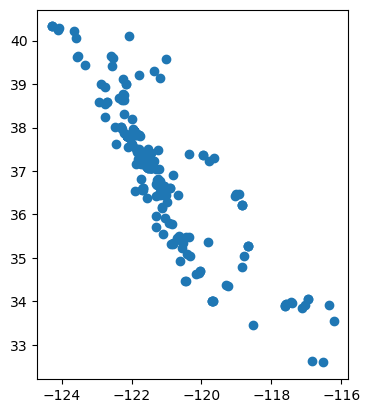

In [18]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a **figure** which can have one or more **axes**. 

The *axes* is only the area specified by a pair of x,y axes and what is plotted in it.

The *figure* can icnlude multiple axes

To create a blank figure:

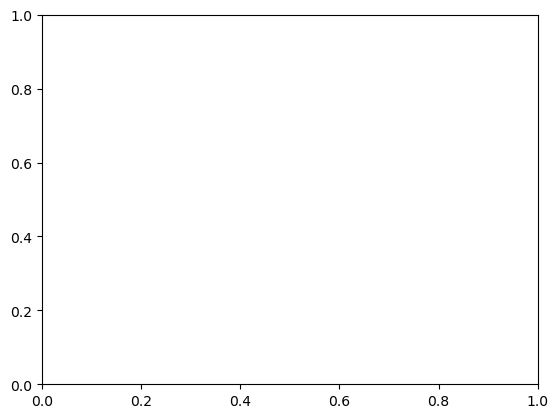

In [19]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display figure
plt.show()

## Add layers

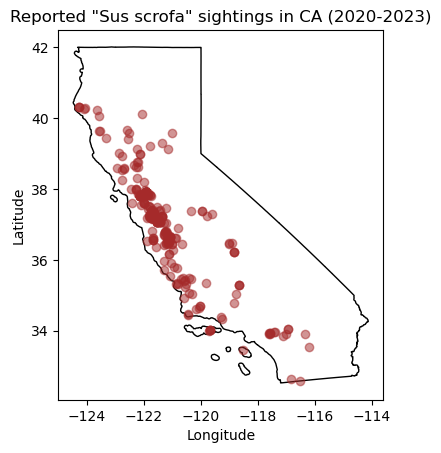

In [25]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Add CA boundary
ca_boundary.plot(ax = ax,
                color = 'none',
                edgecolor = 'black')

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax,
                alpha = 0.5,
                color = 'brown')

# Customization
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()